In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [234]:
df = pd.read_csv(Path("data/penguins_size.csv"))
# Replace . that are in our data with NaN
df.replace('.', np.nan, inplace=True)

# Drop all rows that contain NaN as a value, since we don't want to use those in our calculations
df_clean = df.dropna()

cols = range(2, 6)
num_df = df_clean.iloc[:,cols].to_numpy()
num_df


array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [235]:
#mean = num_df.mean()
#std_dev = num_df.std()
#standardized_num_data = (num_df - mean) / std_dev

cul_len = num_df[:,0]
cul_dep = num_df[:,1]
bm = num_df[:,3]
flip_len = num_df[:,2]

st_cl = np.array((cul_len - cul_len.mean()) / cul_len.std())
st_cd = np.array((cul_dep - cul_dep.mean()) / cul_dep.std())
st_bm = np.array((bm - bm.mean()) / bm.std())
st_fl = np.array((flip_len - flip_len.mean()) / flip_len.std())



standardized_num_data = np.column_stack((st_cl, st_cd, st_fl, st_bm))
standardized_num_data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [236]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=10)

X_data = standardized_num_data[:,[0,1,3]]
y_data = standardized_num_data[:,2] #flipper length

ridge.fit(X_data, y_data)

y_prediction = ridge.predict(X_data)

g_error = ((y_prediction - y_data)**2).mean()

X_data

array([[-8.96041890e-01,  7.80732104e-01, -5.68474783e-01],
       [-8.22787867e-01,  1.19583967e-01, -5.06286182e-01],
       [-6.76279821e-01,  4.24729261e-01, -1.19036080e+00],
       [-1.33556603e+00,  1.08587740e+00, -9.41606392e-01],
       [-8.59414878e-01,  1.74702554e+00, -6.92851986e-01],
       [-9.32668901e-01,  3.23014163e-01, -7.23946287e-01],
       [-8.77728384e-01,  1.23845005e+00,  5.82014344e-01],
       [-5.29771775e-01,  2.21299065e-01, -1.25254940e+00],
       [-9.87609419e-01,  2.05217083e+00, -5.06286182e-01],
       [-1.72014965e+00,  2.00131328e+00,  2.39977036e-01],
       [-1.35387953e+00,  3.23014163e-01, -6.30663385e-01],
       [-9.69295913e-01,  9.33304752e-01, -9.41606392e-01],
       [-2.73382694e-01,  1.79788309e+00,  3.64354239e-01],
       [-1.75677666e+00,  6.28159457e-01, -1.09707790e+00],
       [ 3.67590007e-01,  2.20474348e+00, -8.77737017e-03],
       [-1.13411746e+00,  5.77301908e-01, -1.00379499e+00],
       [-1.15243097e+00,  7.80732104e-01

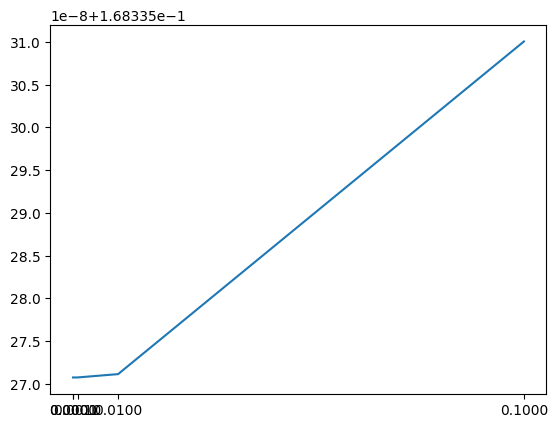

In [237]:
ll = [0, 0.0001, 0.001, 0.01, 0.1]
error_list = []

for item in ll:
    ridge = linear_model.Ridge(alpha=item)
    ridge.fit(X_data, y_data)
    y_prediction = ridge.predict(X_data)
    g_error = ((y_prediction - y_data)**2).mean()
    error_list.append(g_error)

fig,ax = plt.subplots(1,1)
ax.plot(ll, error_list)
ax.set_xticks(ll)

this means we dont need regularization (lambda = 0)

[0.17218161775750296, 0.1721816177565528, 0.172181617755342, 0.17218161775379914, 0.17218161775183308, 0.17218161774932778, 0.17218161774613533, 0.17218161774206736, 0.17218161773688354, 0.17218161773027796, 0.1721816177218606, 0.17218161771113463, 0.1721816176974668, 0.1721816176800502, 0.17218161765785667, 0.172181617629576, 0.17218161759353867, 0.17218161754761724, 0.1721816174891007, 0.1721816174145346]


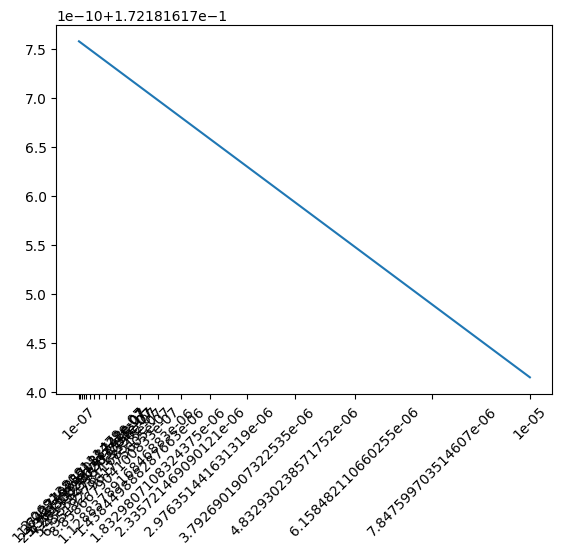

In [238]:
from sklearn import model_selection

#lambdas = [0, 0.00005, 0.0001, 0.00015, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.0010]
#lambdas = [0.0000005, 0.0000010, 0.0000015, 0.0000020, 0.0000025, 0.0000030, 0.0000035, 0.0000040, 0.0000045, 0.000005, 0.000006, 0.000007, 0.000008, 0.000009, 0.00001, 0.000011, 0.000012, 0.000013, 0.000014, 0.000015, 0.000016, 0.000017, 0.000018]
lambdas = 10 ** np.linspace(-7, -5, 20)

error_dict = {l:[] for l in lambdas}

Kten = model_selection.KFold(n_splits = 10, shuffle = True)

for train_indices,test_indices in Kten.split(X_data, y_data):
    X_train_data = X_data[train_indices]
    y_train_data = y_data[train_indices]
    X_test_data = X_data[test_indices]
    y_test_data = y_data[test_indices]
    for llama in lambdas:
        ridge = linear_model.Ridge(alpha=llama)
        ridge.fit(X_train_data, y_train_data)
        y_prediction = ridge.predict(X_test_data)
        g_error = ((y_prediction - y_test_data)**2).mean()
        error_dict[llama].append(g_error)

avg_gen_er = [np.mean(i) for i in error_dict.values()]

print(avg_gen_er)


fig,ax = plt.subplots(1,1)
ax.plot(lambdas, avg_gen_er)
ax.set_xticks(lambdas)
ax.set_xticklabels(lambdas, rotation = 45)
# ax.set_xscale('log')
plt.show()

In [239]:
print(lambdas)
print(avg_gen_er)

[1.00000000e-07 1.27427499e-07 1.62377674e-07 2.06913808e-07
 2.63665090e-07 3.35981829e-07 4.28133240e-07 5.45559478e-07
 6.95192796e-07 8.85866790e-07 1.12883789e-06 1.43844989e-06
 1.83298071e-06 2.33572147e-06 2.97635144e-06 3.79269019e-06
 4.83293024e-06 6.15848211e-06 7.84759970e-06 1.00000000e-05]
[0.17218161775750296, 0.1721816177565528, 0.172181617755342, 0.17218161775379914, 0.17218161775183308, 0.17218161774932778, 0.17218161774613533, 0.17218161774206736, 0.17218161773688354, 0.17218161773027796, 0.1721816177218606, 0.17218161771113463, 0.1721816176974668, 0.1721816176800502, 0.17218161765785667, 0.172181617629576, 0.17218161759353867, 0.17218161754761724, 0.1721816174891007, 0.1721816174145346]
